In [113]:
from sklearn import tree
from sklearn import model_selection
from matplotlib import pyplot as plt # for a good visualization of the trees 
from sklearn.metrics import confusion_matrix

In [114]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

In [115]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#Met en lien les donnée x et y pour trouver une relation entre elles. 

In [116]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

array([0, 1, 0])

In [117]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- class: 0



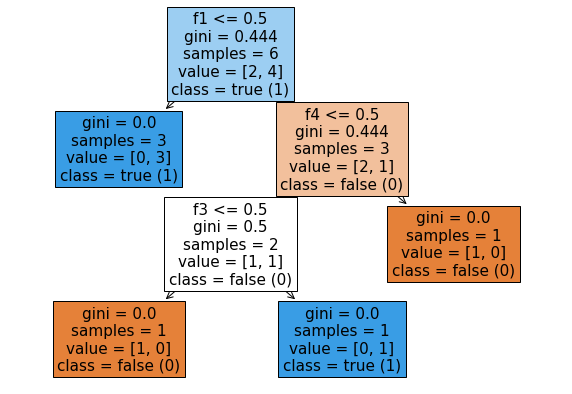

In [118]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

#C'est la représentation graphique de ce que l'arbre a fait.
#On regarde si le premier chiffre est un 0 (<= 0.5) si oui on met un 1. 
#Sinon on regarde le chiffre suivant. Si celui la est un 0 on met un 0.
#Sinon on regarde le 3eme chiffre. Si y a un 0 on met un 0 sinon on met un 1.

Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation.

In [119]:
#On prend un systems de bourse avec l'age, la moyenne scolaire et le revenue. 
#Et en sortie si oui ou non la personne va avoir la bourse. 

#Critere :
# <25 ans , >12 de moyenne, <20 ressources => oui
# >20 de ressources non
# > 25 ans , >14 de moyenne, <16 de ressources
# => 30 ans => NON

X=[[20,15,8], [26, 10, 18], [18,18,6], [21,14,5], [18,4,1], [30, 18, 5], [18, 18, 30], [24, 17, 6], [21, 18, 5], [29, 13, 5], [29, 15, 5], [22, 13, 18]]
Y=[True, False, True, True, False, False, False, True, True, False, True,True]

In [120]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [121]:
clf.predict([[30,19,6]])

array([False])

|--- feature_1 <= 11.50
|   |--- class: False
|--- feature_1 >  11.50
|   |--- feature_0 <= 26.50
|   |   |--- feature_2 <= 24.00
|   |   |   |--- class: True
|   |   |--- feature_2 >  24.00
|   |   |   |--- class: False
|   |--- feature_0 >  26.50
|   |   |--- feature_0 <= 29.50
|   |   |   |--- feature_1 <= 14.00
|   |   |   |   |--- class: False
|   |   |   |--- feature_1 >  14.00
|   |   |   |   |--- class: True
|   |   |--- feature_0 >  29.50
|   |   |   |--- class: False



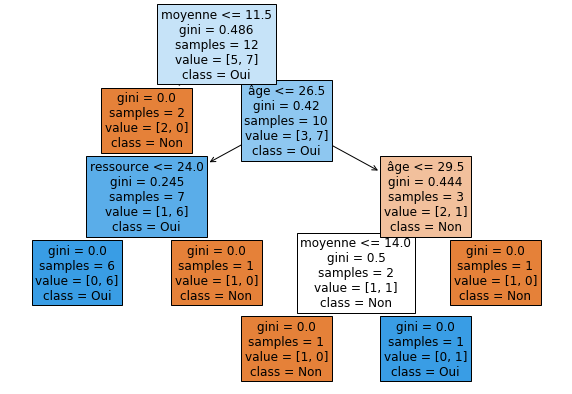

In [122]:
text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("âge","moyenne","ressource"),
                   class_names= ("Non", "Oui" ), 
                   filled=True)

PARTIE 3 :

What are the features? The features are the first line of the csv file : man, juveniles felonies etc...

How many examples in the dataset? 5273

What are your expectations regarding the most important features? 
On s'attend que si on a deja fait de la prison il y a plus de chance d'y retourner
On s'attend également à voir des biais raciale

Propose (informally) a way to reduce the dataset?
- Si que des 0 ou des 1 on peut les enlever
- Si 2 Colones très similaires en garder qu'une
- Si 2 lignes sont exactement les memes on peut les enlever

There many ways to binarize the dataset. How do you propose to do so?
Exemple pour gender : male female

On creer 2 colones differentes gender_male et gender_female et on rempli 0 si on est pas de ce genre et 1 on est de ce genre
Pour l'age on split en different tranche d'age et on met un 1 ou 0 si on appartient a cette tranche d'age

Inspect each of these 4 objects. What do they represent? How many features? examples?
- Features : Nom des features (première ligne du csv)
- Train example : Contenue de la dataset (notre x ici)
- Prediction : Nom de la prediction (Nom de Y)
- Train Label : Contenue de la prediction (contenu de la derniere colonne)


In [123]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

Have a look at the different parameters of the DecisionTreeClassifier.fit function. We will be studying this three parameters,
what do they represent?

- splitter
- max_depth
- min_samples_leaf


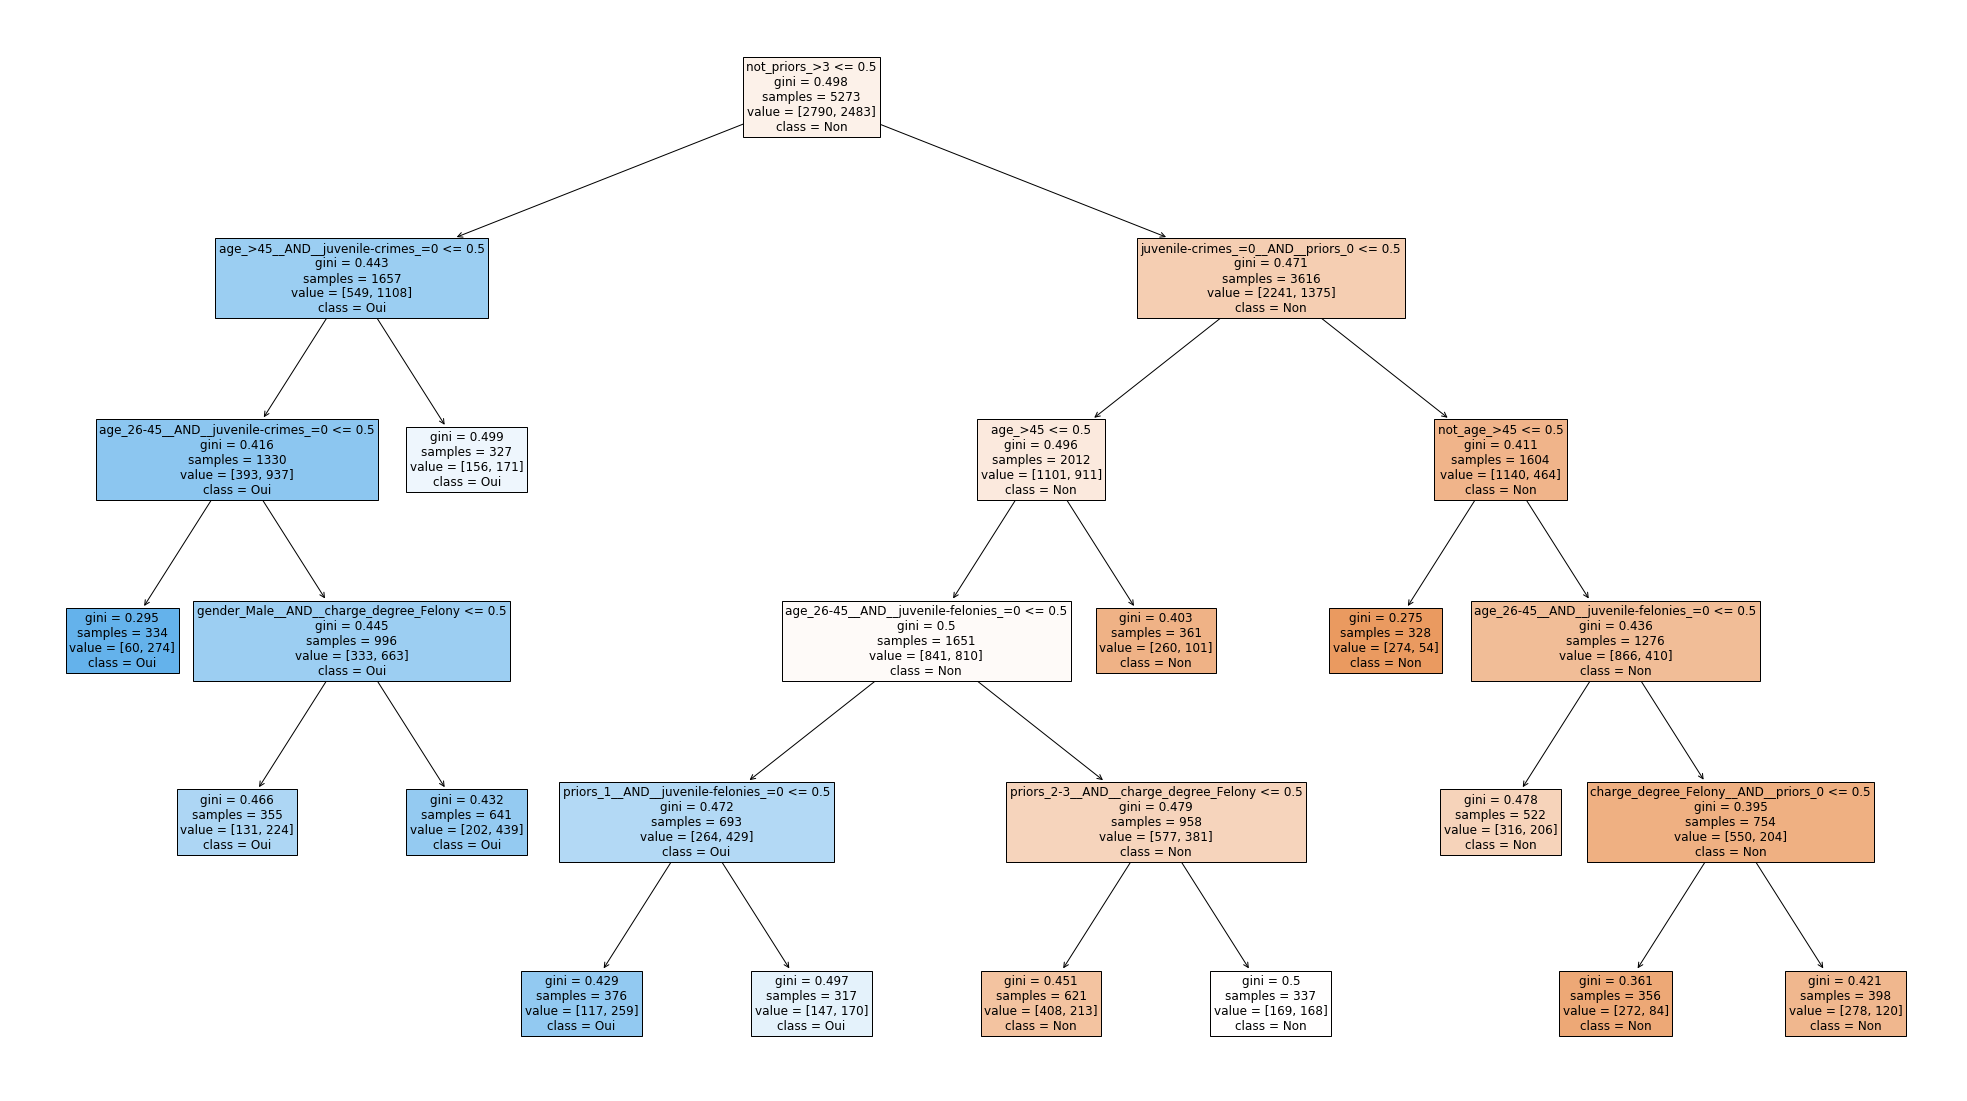

In [124]:
arbre = tree.DecisionTreeClassifier(min_samples_leaf=300)
arbre = arbre.fit(train_examples, train_labels)
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(arbre, 
                   fontsize=12,
                   feature_names= (features),
                   class_names= ("Non", "Oui" ), 
                   filled=True)

In [125]:
#train_data = train_examples[4000:]
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_examples, train_labels, test_size=0.20, random_state=42)

In [130]:
kf = model_selection.KFold(n_splits=5)
kf.get_n_splits(train_examples)
for train_index, test_index in kf.split(train_examples):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_examples[train_index], train_examples[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    clf = tree.DecisionTreeClassifier(max_depth=1)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_train,y_train))    
    #fig = plt.figure(figsize=(35,20))
    #_ = tree.plot_tree(clf, 
                       #fontsize=20,
                       #feature_names= (features),
                       #class_names= ("Non", "Oui" ), 
                       #filled=True)

TRAIN: [1055 1056 1057 ... 5270 5271 5272] TEST: [   0    1    2 ... 1052 1053 1054]
0.6377430061640588
TRAIN: [   0    1    2 ... 5270 5271 5272] TEST: [1055 1056 1057 ... 2107 2108 2109]
0.6318160265528686
TRAIN: [   0    1    2 ... 5270 5271 5272] TEST: [2110 2111 2112 ... 3162 3163 3164]
0.6372688477951636
TRAIN: [   0    1    2 ... 5270 5271 5272] TEST: [3165 3166 3167 ... 4216 4217 4218]
0.6323773406020384
TRAIN: [   0    1    2 ... 4216 4217 4218] TEST: [4219 4220 4221 ... 5270 5271 5272]
0.6364067314529509


QUESTION 5

In [97]:
for train_index, test_index in kf.split(train_examples):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_examples[train_index], train_examples[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    y_predict=clf.predict(X_test)
    print("\n")
    print(confusion_matrix(y_test,y_predict))



[[412 136]
 [237 270]]


[[391 173]
 [185 306]]


[[397 160]
 [215 283]]


[[404 159]
 [206 285]]


[[404 154]
 [235 261]]


Question 6
(idées "propose a way", pas implementation sauf si temps ++ a la fin)
- Soit on compare la part des personnes racisé qui ont récédivisé avec la part de ce que l'algorithme prédit
- On regarde le resultat de l'algo => stocker
    puis on supprime la colone du fichier sur les categorie ethnique
    ensuite on regarde les resultats obtenue sans prendre en compte ce parametre
    on regarde la pourcentage de difference entre les deux vecteurs de resultats
    => cela a donc un impact ou non sur le resultat donc not fair.